# Lending Club Case Study- Risk Analytics

### <font color=red>This file analyses the loan data stored in `loan.csv`.The analysis tries to find driver variables which can help predict loan defaulters</font>

In [99]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
# Reading the first 5 entries in loan.csv

df_1 = pd.read_csv('loan.csv', header=0)
df_1.head()

/Users/ankitasethi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [101]:
# Finding shape(rows and columns) of data set

df_1.shape

(39717, 111)

# <font color= red>Data Cleaning</font>

#### Dropping few columns to simplify analysis- as they are loan behaviour variables, they wont help in analysis
21 columns dropped are-

'delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt',<br> 'total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',<br> 'last_credit_pull_d','application_type'


In [102]:
df_1 = df_1.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'], axis=1)

In [103]:
# Again checking the shape of dataframe

df_1.shape

(39717, 90)

In [104]:
# dropping the id columns -'id', 'member_id'

df_1= df_1.drop(['id', 'member_id'], axis=1)
df_1.shape

(39717, 88)

In [105]:
# deleting rows with value 'Current' in column 'loan_status' as they are ambiguous whether they will default or not
# there are 1140 entries of 'Current' as 'loan_status'

df_1 = df_1[~(df_1.loan_status=='Current')]

# checking if there are any row left with 'Current' as 'loan_status'
print(df_1.loan_status.value_counts())


# printing the current shape of dataframe
df_1.shape

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64


(38577, 88)

### Handling NA values

#### Few columns which only have NA as values in all 38577 rows can be dropped
49 columns dropped are-

tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'



In [106]:
df_1= df_1.drop(['tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'], axis=1)

In [107]:
# Again checking the shape of dataframe

df_1.shape

(38577, 39)

In [108]:
# Checking for NA values

df_1.isna().sum()

loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       2386
emp_length                      1033
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                           12527
purpose                            0
title                             11
zip_code                           0
addr_state                         0
dti                                0
mths_since_last_delinq         24905
mths_since_last_record         35837
initial_list_status                0
next_pymnt_d                   38577
c

In [109]:
# dropping yet again columns with all NA values

df_1= df_1.drop(['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'num_op_rev_tl'], axis=1)

In [110]:
# dropping column 'delinq_amnt'and 'acc_now_delinq' as it has a constant value 0 in all rows
# dropping column 'policy_code' as it has a constant value 1 in all rows
# dropping columns 'grade' and 'sub_grade' as the values in them are assigned by LC
# dropping column 'initial_list_status' as it has a constant value 'f' in all rows

df_1= df_1.drop(['delinq_amnt', 'acc_now_delinq', 'policy_code', 'grade', 'sub_grade', 'initial_list_status'], axis=1)

In [111]:
df_1.isna().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
emp_title                      2386
emp_length                     1033
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12527
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
mths_since_last_delinq        24905
mths_since_last_record        35837
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
pub_rec_bankruptcies            697
tax_liens                        39
dtype: int64

In [112]:
# dropping column 'mths_since_last_record' as majority of the records have NA as values

df_1= df_1.drop('mths_since_last_record', axis=1)

In [113]:
df_1.shape

(38577, 26)

In [114]:
# column 'chargeoff_within_12_mths' has 56 NA values, they cant be dropped or imputed as data might be missing and 
# this column seems promising to find insights about defaulters

df_1['chargeoff_within_12_mths'].isnull().sum()

56

In [115]:
# Getting rid of dubious entries, where information is not available like in 'tax_liens', 
# pub_rec_bankruptcies', 'chargeoff_within_12_mths', 'mths_since_last_delinq'
# emp_title

df_1 = df_1[~((df_1['tax_liens'].isna()) 
     & (df_1.pub_rec_bankruptcies.isna()) 
     & (df_1.chargeoff_within_12_mths.isna()) 
     & (df_1.mths_since_last_delinq.isna())
     & (df_1.emp_title.isna()))]
df_1.shape

(38575, 26)

### Sanity check

In [116]:
# checking 'funded_amnt_inv' should not be greater than 'loan_amnt'

df_1[df_1.funded_amnt_inv > df_1.loan_amnt]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,...,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens


### Data types check

In [117]:
df_1.dtypes

loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
mths_since_last_delinq        float64
collections_12_mths_ex_med    float64
chargeoff_within_12_mths      float64
pub_rec_bankruptcies          float64
tax_liens                     float64
dtype: objec

In [118]:
# Making column 'term' int

df_1.term = df_1.term.apply(lambda x: int(x.replace('months', '').strip()))
df_1.term.dtype

dtype('int64')

In [119]:
# Making column 'int_rate' float

df_1.int_rate = df_1.int_rate.apply(lambda x: float(x.replace('%', '').strip()))
df_1.int_rate.dtype

dtype('float64')

# <font color= red>Data Analysis</font>

In [120]:
df_1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,...,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36,10.65,162.87,NaN,10+ years,RENT,24000.0,...,credit_card,Computer,860xx,AZ,27.65,NaN,0.0,0.0,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,Ryder,< 1 year,RENT,30000.0,...,car,bike,309xx,GA,1.00,NaN,0.0,0.0,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,NaN,10+ years,RENT,12252.0,...,small_business,real estate business,606xx,IL,8.72,NaN,0.0,0.0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,other,personel,917xx,CA,20.00,35.0,0.0,0.0,0.0,0.0
5,5000,5000,5000.0,36,7.90,156.46,Veolia Transportaton,3 years,RENT,36000.0,...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,0.0,0.0,0.0,0.0


In [121]:
# Analysing the column 'annual_inc' 

df_1.annual_inc.describe()

count    3.857500e+04
mean     6.877584e+04
std      6.421962e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.885256e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

### <font color=red>  FINDINGS : Maximum value seems much higher indicating outliers </font>

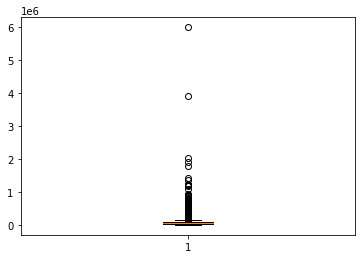

In [85]:
# plotting the boxplot

plt.boxplot(df_1.annual_inc)
plt.show()

### <font color=red>  FINDINGS : Boxplot shows there are significant number of outliers </font>

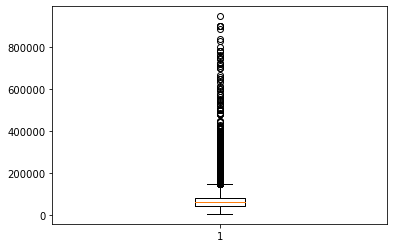

In [123]:
# Removing outliers and then plotting boxplot to obtain more clear graph

df_2= df_1[~(df_1.annual_inc> 1000000.0)]
plt.boxplot(df_2.annual_inc)
plt.show()

### <font color=red>  FINDINGS : Still the Boxplot is not very clear. It shows there are signiciant outliers above the upper fence </font>

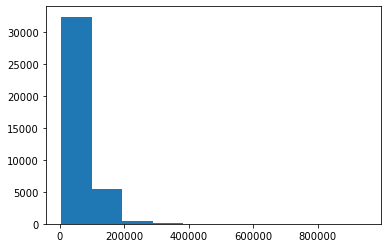

In [133]:
# Plotting the histogram

plt.hist(df_2.annual_inc)
plt.show()

### <font color=red>  FINDINGS : Histogram shows the most of the borrowers have annual income between 0-100000 bucket </font>

In [128]:
df_2.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,...,purpose,title,zip_code,addr_state,dti,mths_since_last_delinq,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36,10.65,162.87,NaN,10+ years,RENT,24000.0,...,credit_card,Computer,860xx,AZ,27.65,NaN,0.0,0.0,0.0,0.0
1,2500,2500,2500.0,60,15.27,59.83,Ryder,< 1 year,RENT,30000.0,...,car,bike,309xx,GA,1.00,NaN,0.0,0.0,0.0,0.0
2,2400,2400,2400.0,36,15.96,84.33,NaN,10+ years,RENT,12252.0,...,small_business,real estate business,606xx,IL,8.72,NaN,0.0,0.0,0.0,0.0
3,10000,10000,10000.0,36,13.49,339.31,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,other,personel,917xx,CA,20.00,35.0,0.0,0.0,0.0,0.0
5,5000,5000,5000.0,36,7.90,156.46,Veolia Transportaton,3 years,RENT,36000.0,...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,NaN,0.0,0.0,0.0,0.0


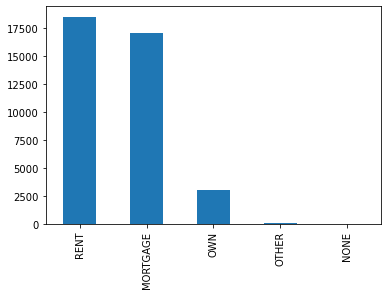

In [132]:
# Analyse the column 'home_ownership'

df_2.home_ownership.value_counts().plot.bar()
plt.show()

### <font color=red>  FINDINGS : Most of the borrowers taking loan are living on rent or mortgage. People who possess their own house borrow less as compared to others </font>